# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目



## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [20]:
import numpy as np
def load_data(path='C:/Users/tianjiayang/digit recognition with Statistical learning and Deep Learning/mnist.npz'):
    """Loads the MNIST d1ataset.
    # Arguments
        path: path where to cache the dataset locally
            (relative to ~/.keras/datasets).
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    path = get_file(path,
                    origin='https://s3.amazonaws.com/img-datasets/mnist.npz',
                    file_hash='8a61469f7ea1b51cbae51d4f78837e45')
    """
    f = np.load(path)
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)
 
# the data, split between train and test sets
(X_raw, y_raw), (X_raw_test, y_raw_test) = load_data()

In [21]:
from keras.datasets import mnist

# (X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

In [22]:
X_raw.shape

(60000, 28, 28)

In [23]:
X_raw_test.shape

(10000, 28, 28)

In [24]:
y_raw.shape

(60000,)

### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

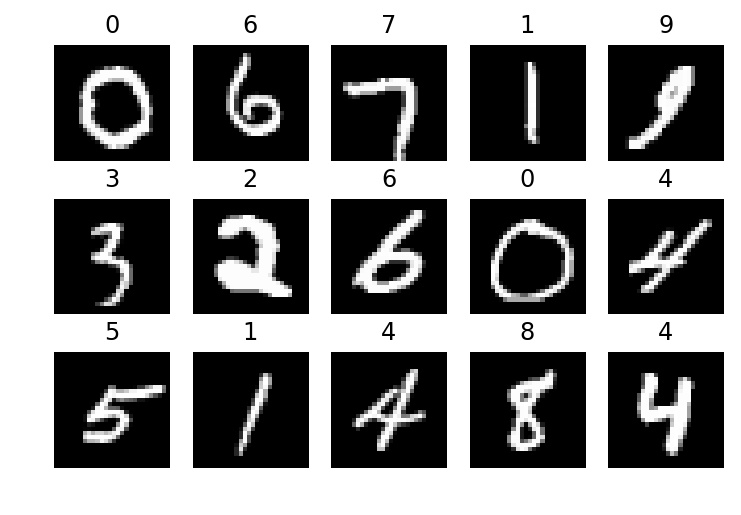

In [25]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split

n_class, n_len, width, height = 11, 5, 28, 28

def generate_dataset(X, y):
    X_len = X.shape[0]
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
    for i in range(X_len):
        rand_len = random.randint(1, 5)
        lis = list()
        for j in range(0, rand_len):
            index = random.randint(0, X_len - 1)
            # 将对应的y置1
            y_gen[j][i][y[index]] = 1
            lis.append(X[index].T)
        # 其余位取空白    
        for m in range(rand_len, 5):
            # 将对应的y置1
            y_gen[m][i][10] = 1
            lis.append(np.zeros((28, 28),dtype=np.uint8))
        lis = np.array(lis).reshape(140,28).T
     
        X_gen[i] = lis.reshape(28,140,1)
        
    return X_gen, y_gen
X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(X_raw, y_raw, test_size=0.2, random_state=50)

X_train, y_train = generate_dataset(X_raw_train, y_raw_train)
X_valid, y_valid = generate_dataset(X_raw_valid, y_raw_valid)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)

In [42]:
print(X_train.shape)

(48000, 28, 140, 1)


设定一个list长度为5，随机取n个数为有数字的类型，其余数字为空白，标记为第11类（编号为10），实现了左对齐的需求。根据Reviewer的提示，lis的每个数是原矩阵的转置，拼成一个140*28的矩阵后整体转置，作为X_gen的第i个数，直接赋给X_gen[i]，运行识别原来快些，lis想不出怎么去除了，似乎还得append。

训练集是用来训练模型的，验证集是用来对训练的模型进行进一步调参优化，如果使用测试集验证，网络就会记住测试集，容易使模型过拟合，测试集用来测试模型表现。m

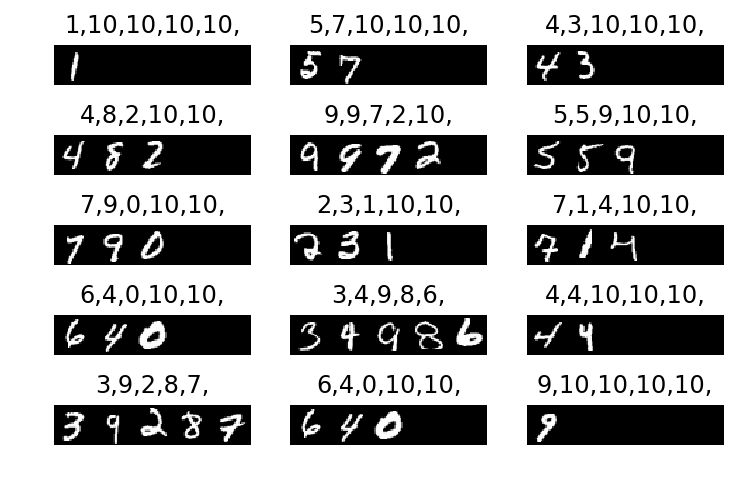

In [43]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

### 问题 1
_你是如何合成数据集的？为什么要分训练集，验证集和测试集？_

**回答：**
随机取1~5个数字，并拼接成新的图片，缺少的图片用空白替代，空白对应的标志是10

训练集自不必说，验证集为了调参；测试集为了测试最终性能（因为模型经过验证集多次验证会不由自主的向验证集偏向，等于是一种data snooping）

### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [函数式模型 API](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [44]:
from keras.models import Model
from keras.layers import *
import tensorflow as tf

# This returns a tensor
inputs = Input(shape=(28, 140, 1))

conv_11 = Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu')(inputs)
max_pool_11 = MaxPool2D(pool_size=(2,2))(conv_11)
conv_12 = Conv2D(filters= 10, kernel_size=(3,3), padding='Same', activation='relu')(max_pool_11)
max_pool_12 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv_12)
flatten11 = Flatten()(max_pool_12)
hidden11 = Dense(15, activation='relu')(flatten11)
prediction1 = Dense(11, activation='softmax')(hidden11)

# conv_21 = Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu')(inputs)
# max_pool_21 = MaxPool2D(pool_size=(2,2))(conv_21)
# conv_22 = Conv2D(filters= 10, kernel_size=(3,3), padding='Same', activation='relu')(max_pool_21)
# max_pool_22 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv_22)
# flatten21 = Flatten()(max_pool_22)
hidden21 = Dense(15, activation='relu')(flatten11)
prediction2 = Dense(11, activation='softmax')(hidden21)

# conv_31 = Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu')(inputs)
# max_pool_31 = MaxPool2D(pool_size=(2,2))(conv_31)
# conv_32 = Conv2D(filters= 10, kernel_size=(3,3), padding='Same', activation='relu')(max_pool_31)
# max_pool_32 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv_32)
# flatten31 = Flatten()(max_pool_32)
hidden31 = Dense(15, activation='relu')(flatten11)
prediction3 = Dense(11, activation='softmax')(hidden31)

# conv_41 = Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu')(inputs)
# max_pool_41 = MaxPool2D(pool_size=(2,2))(conv_41)
# conv_42 = Conv2D(filters= 10, kernel_size=(3,3), padding='Same', activation='relu')(max_pool_41)
# max_pool_42 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv_42)
# flatten41 = Flatten()(max_pool_42)
hidden41 = Dense(15, activation='relu')(flatten11)
prediction4 = Dense(11, activation='softmax')(hidden41)

# conv_51 = Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu')(inputs)
# max_pool_51 = MaxPool2D(pool_size=(2,2))(conv_51)
# conv_52 = Conv2D(filters= 10, kernel_size=(3,3), padding='Same', activation='relu')(max_pool_51)
# max_pool_52 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv_52)
# flatten51 = Flatten()(max_pool_52)
hidden51 = Dense(15, activation='relu')(flatten11)
prediction5 = Dense(11, activation='softmax')(hidden51)

model = Model(inputs=inputs, outputs=[prediction1,prediction2,prediction3,prediction4,prediction5])
# model = Model(inputs=inputs, outputs=prediction1)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 140, 1)   0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 28, 140, 32)  832         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 14, 70, 32)   0           conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 14, 70, 10)   2890        max_pooling2d_10[0][0]           
__________________________________________________________________________________________________
max_poolin

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：** 
回答：使用了卷积神经网络。卷积神经网络虽然运行慢，但是在识别图像中表现很好，因为它可以用到相邻像素间的信息，这是深度学习网络忽略掉的信息。卷积神经网络的原理是通过卷积核在图片上做卷积，学习得到特征，最底层是简单的线条，之后图形逐层复杂，多个卷积核在图片上做卷积，可以增加输出节点的深度，越深，携带的信息越多，当然，也要根据不同的情况进行调参，比如调整学习率、卷积核、stride、激活函数、损失函数、迭代次数、是否dropout等等。

补充：

Softmax：对于多分类问题，softmax函数可以得到各个分类的概率值。

Activation function：激活函数是为了给网络加入非线性因素，如果没有激活函数，网络就是一个线性分类器，y=wx+b，如果这个y值通过了激活函数，结果就不是线性的了。这里用了relu激活函数， f(x)=max(0,x)，优点是得到的SGD的收敛速度会比 sigmoid快很多，相比于 sigmoid/tanh需要计算指数等，计算复杂度高，ReLU 只需要一个阈值就可以得到激活值，缺点是ReLU在训练的时候很”脆弱”，一不小心有可能导致神经元”坏死”，优缺点摘自几种常见的激活函数

dropout：为了避免大型深度网络过拟合，会在训练时使用dropout来丢掉一些神经元，这样做可以提高模型的表现。

rmsprop：一种寻找损失函数最小值的优化方法。优化方法总结中提到RMSprop是Geoff Hinton提出的一种自适应学习率方法。Adagrad会累加之前所有的梯度平方，而RMSprop仅仅是计算对应的平均值，因此可缓解Adagrad算法学习率下降较快的问题。

categorical_crossentropy：一种损失函数，也成多类对数损失，使用该目标函数时，需要将标签转化为形如(nb_samples, nb_classes)的二值序列，摘自keras学习笔记03——常见重要模块

问题 3¶

你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）


回答：使用了卷积神经网络的经典模型，一共6层，卷积层（卷积核55，激活函数relu，padding是Same，32个卷积核）->最大池化层（22）->卷积层（33，relu，Same，10）->最大池化层（22，strde2*2）->flatten->hidden（15）），本来应该还有一个隐藏层，但是发现没有表现也很好，为了运行速度，所以就去掉了。五个分类器从过了卷积层开始，因为经过无数次试验，不用从一开始input就分成5个，可以用卷积层学到特征，然后最后深度学习网络分成五个去识别。


这里是疑问： 开始受笔记本电脑性能限制，没用gpu，训练上述一模一样的网络，每个分类器的accuracy是0.1，所以我又不断调整参数以及网络结构，正确率都是0.1左右，而我换成gpu，为什么performance会好？还有依然是cpu上试验，我换成上述代码中取消注释后的网络结构，即从inputs就开始分成5个分类器的网络后，只有1个accuracy是0.9+，其他都是0.1以下，这是为什么？感觉就像一样的老师一样的东西，只有一个学生聪明，其他都是傻子。然后我又换成只有1个分类器，识别第一位，accuracy是0.9+，识别其他位正确率也很高，只要是单独识别一位就好，这是为什么？难道5个独立的分类器一起训练会互相干扰？所有cpu失败的网络在gpu上一跑，performance都特别好，感觉花了好几天时间调调网络结构，不如换一块gpu……

### 练习：训练你的网络模型

训练你的模型时，需要设置训练集和验证集。

In [47]:
from keras.callbacks import ReduceLROnPlateau
# TODO: 训练你的模型
learnrate_reduce_1 = ReduceLROnPlateau(monitor='val_dense_2_acc', patience=2, verbose=1,factor=0.8, min_lr=0.00001)
learnrate_reduce_2 = ReduceLROnPlateau(monitor='val_dense_4_acc', patience=2, verbose=1,factor=0.8, min_lr=0.00001)
learnrate_reduce_3 = ReduceLROnPlateau(monitor='val_dense_6_acc', patience=2, verbose=1,factor=0.8, min_lr=0.00001)
learnrate_reduce_4 = ReduceLROnPlateau(monitor='val_dense_8_acc', patience=2, verbose=1,factor=0.8, min_lr=0.00001)
learnrate_reduce_5 = ReduceLROnPlateau(monitor='val_dense_10_acc', patience=2, verbose=1,factor=0.8, min_lr=0.00001)

model.fit(X_train, y_train, epochs=20, batch_size=128,
          validation_data=(X_valid, y_valid), 
         callbacks=[learnrate_reduce_1,learnrate_reduce_2,learnrate_reduce_3,learnrate_reduce_4,learnrate_reduce_5])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 162s 3ms/step - loss: 2.7771 - dense_2_loss: 0.6986 - dense_4_loss: 0.6181 - dense_6_loss: 0.6244 - dense_8_loss: 0.4774 - dense_10_loss: 0.3587 - dense_2_acc: 0.7892 - dense_4_acc: 0.8108 - dense_6_acc: 0.8094 - dense_8_acc: 0.8528 - dense_10_acc: 0.9050 - val_loss: 0.5949 - val_dense_2_loss: 0.1600 - val_dense_4_loss: 0.1267 - val_dense_6_loss: 0.1258 - val_dense_8_loss: 0.0847 - val_dense_10_loss: 0.0976 - val_dense_2_acc: 0.9518 - val_dense_4_acc: 0.9612 - val_dense_6_acc: 0.9612 - val_dense_8_acc: 0.9745 - val_dense_10_acc: 0.9713
Epoch 2/20
48000/48000 [==============================] - 164s 3ms/step - loss: 0.4029 - dense_2_loss: 0.1002 - dense_4_loss: 0.0849 - dense_6_loss: 0.0848 - dense_8_loss: 0.0675 - dense_10_loss: 0.0656 - dense_2_acc: 0.9701 - dense_4_acc: 0.9749 - dense_6_acc: 0.9764 - dense_8_acc: 0.9803 - dense_10_acc: 0.9826 - val_loss: 0.4027 - val_dense_2_los


Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.00032768002711236477.
Epoch 14/20
48000/48000 [==============================] - 155s 3ms/step - loss: 0.0028 - dense_2_loss: 8.7927e-04 - dense_4_loss: 7.7660e-04 - dense_6_loss: 0.0010 - dense_8_loss: 1.0052e-04 - dense_10_loss: 1.8548e-05 - dense_2_acc: 0.9998 - dense_4_acc: 0.9999 - dense_6_acc: 0.9999 - dense_8_acc: 1.0000 - dense_10_acc: 1.0000 - val_loss: 0.5394 - val_dense_2_loss: 0.1477 - val_dense_4_loss: 0.1608 - val_dense_6_loss: 0.0925 - val_dense_8_loss: 0.0768 - val_dense_10_loss: 0.0615 - val_dense_2_acc: 0.9800 - val_dense_4_acc: 0.9820 - val_dense_6_acc: 0.9893 - val_dense_8_acc: 0.9908 - val_dense_10_acc: 0.9927

Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.0002621440216898918.

Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.00020971521735191345.
Epoch 15/20
48000/48000 [==============================] - 160s 3ms/step - loss: 0.0024 - dense_2_loss: 6.8848e-04 - dense_4_loss: 6.9064e

### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [48]:
def evaluate(model):
    # TODO: 按照错一个就算错的规则计算准确率.
    right = 0
    total = len(X_test)
    result = model.predict(X_test)

    for i in range(total):
        if str(np.argmax(result[0][i])) == str(np.argmax(y_test[0][i])) \
                and str(np.argmax(result[1][i])) == str(np.argmax(y_test[1][i])) \
                and str(np.argmax(result[2][i])) == str(np.argmax(y_test[2][i])) \
                and str(np.argmax(result[3][i])) == str(np.argmax(y_test[3][i])) \
                and str(np.argmax(result[4][i])) == str(np.argmax(y_test[4][i])):
            right += 1
    return right / total
    
evaluate(model)

0.9446

### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：**

94.46%

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

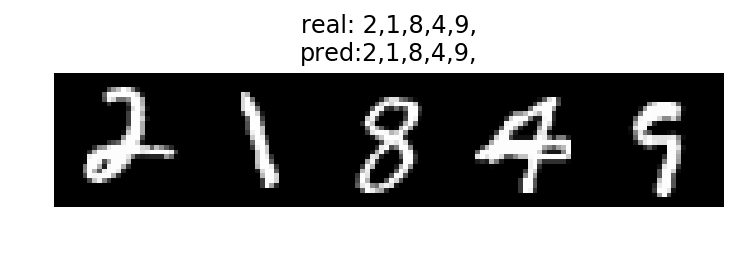

In [49]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1, height, width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要保存模型，以便下次调用。

读取的方式也很简单：`model = load_model('model.h5')`

In [50]:
model.save('model.h5')